#                           S&P 500 Index  Stock Price Prediction                    

In [9]:
import numpy as np                                                  # for numeric calculation
import pandas as pd                                                 # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential                                 # for model
from keras.layers import LSTM,Dense                                 # add in model
from sklearn.preprocessing import MinMaxScaler                      # Covert data in 0,1 form
import matplotlib.pyplot as plt                                     # Graph Plotting

## Load Data 

In [10]:
data = pd.read_csv('GSPC.csv')                                      # Data loading
print(data.head())                                                  # printing head data                                              # Necessary column for predcition               

         Date       Open       High        Low      Close  Adj Close    Volume
0  1970-03-02  89.500000  90.800003  88.919998  89.709999  89.709999  12270000
1  1970-03-03  89.709999  90.669998  88.959999  90.230003  90.230003  11700000
2  1970-03-04  90.230003  91.050003  89.320000  90.040001  90.040001  11850000
3  1970-03-05  90.040001  90.989998  89.379997  90.000000  90.000000  11370000
4  1970-03-06  90.000000  90.360001  88.839996  89.440002  89.440002  10980000


## Data Cleaning 

In [51]:
Ness=data['Adj Close']                               # Remvoing all the data taking only Adj close column to calcuation.

## Data Setting  

In [11]:
Curr_data = Ness.values                              #Fecthing only data value
scl = MinMaxScaler()                                 # MinMaxScaler to convert data in 0 ,1 
Curr_data = Curr_data.reshape(Curr_data.shape[0],1)  #data reshaping
Curr_data = scl.fit_transform(Curr_data)             #fitting using scaler
Curr_data

array([[0.00825243],
       [0.00840887],
       [0.00835171],
       ...,
       [0.91884159],
       [0.87743507],
       [0.87005209]])

In [12]:
def processData(data,lb,gap):                                       #data process
    X,Y = [],[]
    for i in range(len(data)-lb-gap-1):                             # Converting data according to model
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb+gap),0])
    return np.array(X),np.array(Y)
X,y = processData(Curr_data,5,5)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]  #80% for training and 20% for testing
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]  #.....

## Model 

In [13]:
model = Sequential()                            # It is for sequential calculation
model.add(LSTM(256,input_shape=(5,1)))          # passing reuired Parameter to the Keras LSTM
model.add(Dense(1))                             # Adding Dence Layer 
model.compile(optimizer='adam',loss='mse')      # using Adam Optimizer
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1)) #Covert 2d in 3d Lstm take 3d input
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))     #2D-->3d 
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),shuffle=False) #running for 100 epoch

Train on 10081 samples, validate on 2521 samples
Epoch 1/10
10081/10081 [==============================] - 31s 3ms/step - loss: 2.4021e-04 - val_loss: 0.0250
Epoch 2/10
10081/10081 [==============================] - 27s 3ms/step - loss: 5.8074e-04 - val_loss: 0.0218
Epoch 3/10
10081/10081 [==============================] - 26s 3ms/step - loss: 5.4131e-04 - val_loss: 0.0227
Epoch 4/10
10081/10081 [==============================] - 26s 3ms/step - loss: 4.9249e-04 - val_loss: 0.0171
Epoch 5/10
10081/10081 [==============================] - 27s 3ms/step - loss: 4.0048e-04 - val_loss: 0.0108
Epoch 6/10
10081/10081 [==============================] - 29s 3ms/step - loss: 2.5005e-04 - val_loss: 0.0013
Epoch 7/10
10081/10081 [==============================] - 27s 3ms/step - loss: 1.2243e-04 - val_loss: 3.5482e-04
Epoch 8/10
10081/10081 [==============================] - 26s 3ms/step - loss: 5.9335e-05 - val_loss: 2.7958e-04
Epoch 9/10
10081/10081 [==============================] - 28s 3ms/step 

## Graph Between Actual and Predicted Result.

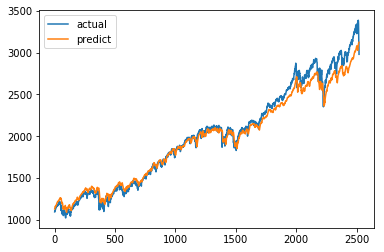

In [14]:
Xt = model.predict(X_test)                                                       # Xt predection value           
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='actual')            # Reshape actual data and transform
plt.plot(scl.inverse_transform(Xt), label='predict')                             # transfrom prediction data
plt.legend()                                                                     # plotting data
plt.show()

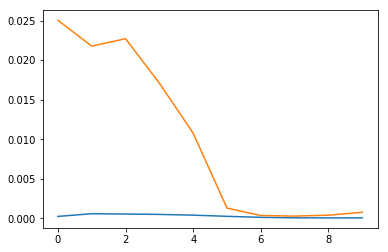

In [15]:
plt.plot(history.history['loss'])                                                #Graph Between value loss
plt.plot(history.history['val_loss'])

# Score

In [43]:
Xt=Xt.reshape(Xt.shape[0])
def score(y_truth,y_pred):
    u=((y_truth-y_pred)**2).sum()
    v=((y_truth-y_truth.mean())**2).sum()
    return 1-u/v
print("Testing Score: "score(Xt,y_test))

0.9311125255373698


## Prediction for Different time slot     
    
    

In [36]:
def setdata(data,days):
    check_data=data[:days:]
    ness1=check_data['Adj Close']
    check_data = ness1.values                               #Fecthing only data value
    scl = MinMaxScaler()                                    # MinMaxScaler to convert data in 0 ,1 
    check_data = check_data.reshape(check_data.shape[0],1)  #data reshaping
    check_data = scl.fit_transform(check_data)              #fitting using scaler
    return check_data
def prepData(data,lb,gap):                                  #data process
    X,Y = [],[]
    for i in range(len(data)-lb-gap-1):                     # Converting data according to model
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb+gap),0])
    return np.array(X),np.array(Y)
prep_data=setdata(data[:1000:],1000)                       #can Pass x_test for given time 30 days means one month.
X,y = processData(prep_data,5,5)                           #After getting one month data you can chekc for all the days of month.

In [37]:
X_test=X
y_test=y
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [38]:
Xt = model.predict(X_test)  
Xt = Xt.reshape(Xt.shape[0])

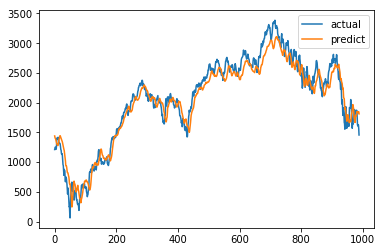

In [39]:
Xt = model.predict(X_test)                                                       # Xt predection value           
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='actual')            # Reshape actual data and transform
plt.plot(scl.inverse_transform(Xt), label='predict')                             # transfrom prediction data
plt.legend()                                                                     # plotting data
plt.show()

In [50]:
act = []
pred = []
for i in range(100):
    #i=X_test.shape[0]-1
    Xt = model.predict(X_test[i].reshape(1,5,1))                                         #reshaping the data 
    print('predicted:{0}'.format(scl.inverse_transform(Xt)))                             #printing top 100 Adj Close

predicted:[[1440.6364]]
predicted:[[1415.0251]]
predicted:[[1399.7065]]
predicted:[[1393.453]]
predicted:[[1371.2228]]
predicted:[[1348.1146]]
predicted:[[1320.8724]]
predicted:[[1306.461]]
predicted:[[1306.5868]]
predicted:[[1295.7074]]
predicted:[[1281.2014]]
predicted:[[1279.3784]]
predicted:[[1298.7314]]
predicted:[[1347.9993]]
predicted:[[1381.2643]]
predicted:[[1393.2301]]
predicted:[[1416.1283]]
predicted:[[1443.4208]]
predicted:[[1443.8827]]
predicted:[[1429.5212]]
predicted:[[1412.9075]]
predicted:[[1397.3479]]
predicted:[[1383.6779]]
predicted:[[1373.0162]]
predicted:[[1358.966]]
predicted:[[1338.9961]]
predicted:[[1312.1509]]
predicted:[[1291.2372]]
predicted:[[1259.3292]]
predicted:[[1226.1183]]
predicted:[[1213.4961]]
predicted:[[1196.105]]
predicted:[[1154.9683]]
predicted:[[1107.767]]
predicted:[[1073.6176]]
predicted:[[1021.2783]]
predicted:[[948.267]]
predicted:[[938.8345]]
predicted:[[939.5899]]
predicted:[[912.144]]
predicted:[[869.7926]]
predicted:[[829.82336]]
pred